# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Solución

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

import logging
tf.get_logger().setLevel(logging.ERROR)


TensorFlow 1.x selected.


## Lectura CSV


In [0]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/ANN-2019-2/evaluacion-edalpin/master/datos/diabetes.csv')

## Relacion entre variables

Para indentificar correlación entre las variables contenidas en el documento CSV, usaré el metodo *corr* el cualme permite obtener valores de correlación entre todas las variables, proporcionando un valor entre -1 y 1, entre mas cercano al 0 menor sera la corrrelación.

In [4]:
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Resultados:
*   s1 y s2 tienen la mas alta relacion reportada en la tabla con  *0.896663*, pro este motivo borraremos s2.
*   s4 y s3 tambien tienen una alta relacion, con un valor de *-0.738493*, al ser negativo borarremos s4

In [5]:
diabetes_df = diabetes_df.drop(['s2', 's4'], axis=1)
print(diabetes_df)

          age       sex       bmi  ...        s5        s6      Y
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646  151.0
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204   75.0
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930  141.0
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362  206.0
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641  135.0
..        ...       ...       ...  ...       ...       ...    ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207  178.0
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485  104.0
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491  132.0
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930  220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064   57.0

[442 rows x 9 columns]


## Comparacion entre transformaciones

Al contar con numeros negativos en el data frame, no usaremos al no ser transformaciones recomendables para este set de datos:
*   Ln
*   Raiz





In [6]:
transformaciones = [
  ("Funcion Cuadratica", lambda x: x**2),
  ("Funcion Exponencial", lambda x: np.exp(x)),
  ("Funcion Identidad", lambda x: x)
]

for nombre, trans in transformaciones:
    df = diabetes_df.apply(trans)
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Y'], axis=1), 
                                                        df['Y'],
                                                        test_size=0.30)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    print( nombre )
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print(" \n")
    
    

Funcion Cuadratica
MAE: 22310.558029847405
MSE: 706445806.8345096
RMSE: 26579.048268034534
 

Funcion Exponencial
MAE: 2.0965827777875628e+148
MSE: 6.958075449795596e+296
RMSE: 2.6378164170001665e+148
 

Funcion Identidad
MAE: 44.703901998664755
MSE: 3078.9662905552964
RMSE: 55.488433844859024
 



El error mas pequeño se obtiene con la identidad(sin transformacion de datos). Por lo cual usaremos los datos sin transformar para minimizar el error.

## Modelo

In [7]:
print(diabetes_df)

          age       sex       bmi  ...        s5        s6      Y
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646  151.0
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204   75.0
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930  141.0
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362  206.0
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641  135.0
..        ...       ...       ...  ...       ...       ...    ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207  178.0
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485  104.0
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491  132.0
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930  220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064   57.0

[442 rows x 9 columns]


In [8]:
x=diabetes_df.drop(['Y'],axis=1)
y=diabetes_df[['Y']]
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.30)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
def graficar(history, units):    
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Modelo con ' + str(units) + " neuronas")
    plt.ylabel('Perdida')
    plt.xlabel('Periodo')
    plt.legend(['Entrenamiento', 'validacion'], loc='upper left')
    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


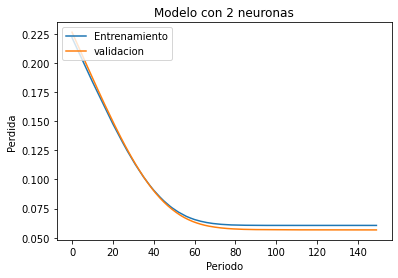

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


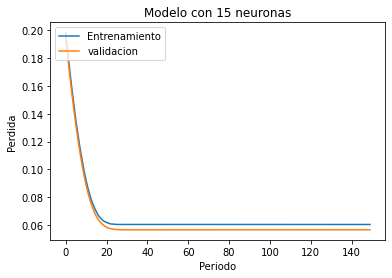

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 612)               5508      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 613       
Total params: 6,121
Trainable params: 6,121
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


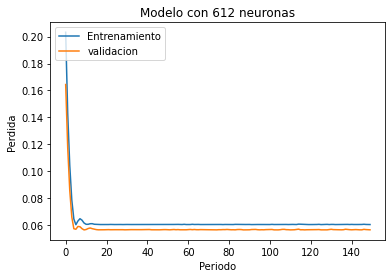

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3040)              27360     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3041      
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


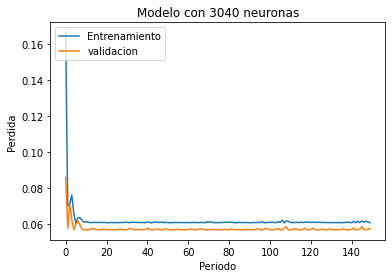

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 7084)              63756     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7085      
Total params: 70,841
Trainable params: 70,841
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


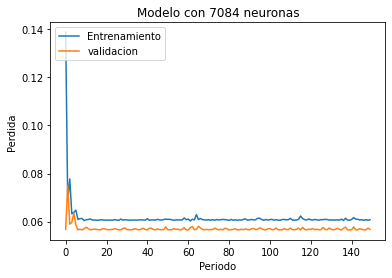

In [10]:
listaNeuronas = [2, 15, 612, 3040, 7084]
for neuronas in listaNeuronas:
    model = Sequential()
    model.add(Dense(neuronas, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history = model.fit(X_train, y_train, epochs=150, batch_size=70, verbose=0, validation_split=0.15)
    graficar(history, neuronas)

En este caso se tomo una cantidad de neuronas aleatorias menores a 10000.
Con los gráficos podemos observar que partir de 15 neuronas se vuelven muy parecidos los modelos y cuando las neuronas son muchas empieza a haber mas fluctuación en las perdidas. 2 neuronas muestran resultados favorables no son suficientes dado que su desempeño en el periodo no es el mejor, con un número cercano a 15 las perdidas no fluctuan mucho.



## Comparacion de resultados utilizando crossvalidation

In [11]:
X = diabetes_df.drop(["Y"],axis = 1).values
y = diabetes_df["Y"].values

def cross_validation(train_index, test_index,X,y):    
    
    X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index])
    y_train, y_test = pd.DataFrame(y[train_index]), pd.DataFrame(y[test_index])
    
    X_train.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']
    X_test.columns = X_train.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']

    sex = tf.feature_column.numeric_column('sex')
    bmi = tf.feature_column.numeric_column('bmi')
    bp = tf.feature_column.numeric_column('bp')
    s1 = tf.feature_column.numeric_column('s1')
    s5 = tf.feature_column.numeric_column('s5')
    s6 = tf.feature_column.numeric_column('s6')

    feat_cols = [sex, bmi, bp, s1, s5, s6]
    input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                     y= y_train[0],
                                                     batch_size=10,
                                                     num_epochs=3000,
                                                     shuffle=False)
    
    model = tf.estimator.DNNRegressor(hidden_units=[4,4,4],feature_columns=feat_cols)

    model.train(input_fn=input_func,steps=5000)

    predict_input_func = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)

    pred_gen = model.predict(predict_input_func)

    predictions = list(pred_gen)

    final_preds = []

    for pred in predictions:
        final_preds.append(pred['predictions'])   

    return metrics.mean_squared_error(y_test, final_preds)

from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

resultado_cross = []

for train_index, test_index in kf.split(X):    
    resultado_cross.append(cross_validation(train_index,test_index,X,y))
    
print("MSE del Cross validation: ", np.array(resultado_cross).sum()/len(resultado_cross))

MSE del Cross validation:  3114.7583141327636


# Conclusión

Ateriormente seleccionamos

Funcion Identidad
*   MAE: 44.703901998664755
*   MSE: 3078.9662905552964
*   RMSE: 55.488433844859024

Red Neuronal
*   MSE: 3114.7583141327636

El MSE de la red neuronal nos da menor por lo que sería el modelo adecuado para aplicar.